In [1]:
system("git clone https://github.com/dviraran/xCell.git")
sdy311 = readRDS('xCell/vignettes/sdy311.rds')
sdy420 = readRDS('xCell/vignettes/sdy420.rds')
source('xCell/R/xCell.R')
load('xCell/data/xCell.data.rda')
install.packages('pracma')
install.packages('quadprog')
install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GSVA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'GSVA'

also installing the dependencies ‘zlibbioc’, ‘bitops’, ‘plogr’, ‘png’, ‘Biostrings’, ‘formatR’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘xtable’, ‘RSQLite’, ‘KEGGREST’, ‘lambda.r’, ‘futile.options’, ‘BiocGenerics’, ‘MatrixGenerics’, ‘GenomicRanges’, ‘GenomeInfoDb’, ‘annotate’, ‘graph’, ‘AnnotationDbi’, ‘XML’, ‘futile.logger’, ‘snow’, ‘BH’, ‘matrixStats’, ‘rhdf5’, ‘rhdf5filters’, ‘Rhdf5lib’, ‘ScaledMatrix’, ‘irlba’, ‘rsvd’, ‘beachmat’, ‘S4Vectors’, ‘IRanges’, ‘Biobase’, ‘SummarizedExperiment’, ‘GSEABase’, ‘BiocParallel’, ‘SingleCellExperiment’, ‘sparseMatrixStats’, ‘DelayedArray’, ‘DelayedMatrixStats’, ‘HDF5Array’, ‘BiocSingular’




In [3]:
sdy = sdy420
raw.scores = rawEnrichmentAnalysis(as.matrix(sdy$expr),
                                    xCell.data$signatures,
                                    xCell.data$genes,
                                    parallel.type='FORK')

colnames(raw.scores) = gsub("\\.1","",colnames(raw.scores))
raw.scores = aggregate(t(raw.scores)~colnames(raw.scores),FUN=mean)
rownames(raw.scores) = raw.scores[,1]
raw.scores = raw.scores[,-1]
raw.scores = t(raw.scores)

cell.types = rownames(sdy$fcs) 
cell.types.use = intersect(rownames(raw.scores),rownames(sdy$fcs))
transformed.scores = transformScores(raw.scores[cell.types.use,],xCell.data$spill.array$fv)
scores = spillOver(transformed.scores,xCell.data$spill.array$K)
#s = y
A = intersect(colnames(sdy$fcs),colnames(scores))
scores = scores[,A]
#scores

#sdy311$fcs= sdy311$fcs[,-which(colnames(sdy311$fcs) %in% c("SUB134240","SUB134283"))]
#scores311 = get.xCell.scores(sdy311)
#scores420 = get.xCell.scores(sdy420)

[1] "Num. of genes: 5888"


Warning message in .gsva(expr, mapped.gset.idx.list, method, kcdf, rnaseq, abs.ranking, :
“Some gene sets have size one. Consider setting 'min.sz > 1'.”


Setting parallel calculations through a MulticoreParam back-end
with workers=4 and tasks=100.
Estimating ssGSEA scores for 489 gene sets.
  |======================================================================| 100%



In [5]:
transformed.scores

,SUB137169,SUB137172,SUB137208,SUB137209,SUB137220,SUB137224,SUB137269,SUB137270,SUB137272,SUB137273,⋯,SUB137812,SUB137824,SUB137842,SUB137848,SUB137863,SUB137865,SUB137866,SUB137871,SUB137887,SUB137889
B-cells,0.12291946,0.17467388,0.16546547,0.12041098,0.11223590,0.12216599,0.15728071,0.16159974,0.11847411,0.15610260,⋯,0.15787167,0.02940915,0.12790051,0.002753758,0.13140017,0.12438281,0.14512976,0.13356240,0.09164379,0.1144765244
CD4+ naive T-cells,0.17969634,0.08026759,0.18279758,0.15003239,0.17150006,0.16639082,0.20189850,0.21518934,0.13300397,0.13293387,⋯,0.13804098,0.15544267,0.19067715,0.219263768,0.11933162,0.17412921,0.19181060,0.12587077,0.16999214,0.1112755700
CD4+ T-cells,0.26450770,0.17869040,0.21961297,0.20837722,0.25088949,0.23750544,0.27709342,0.26516569,0.18004098,0.21464648,⋯,0.21542027,0.17729421,0.22485222,0.277612806,0.20432471,0.22772158,0.24424216,0.17781206,0.20214608,0.1902312497
CD4+ Tcm,0.17567950,0.03352138,0.12532052,0.09591495,0.12401128,0.14328981,0.14926512,0.13170807,0.11843317,0.10387818,⋯,0.04267954,0.08408102,0.12384564,0.184302419,0.10400999,0.09967079,0.11588898,0.06822953,0.11259692,0.0620306622
CD4+ Tem,0.16951378,0.09120567,0.11316852,0.11316995,0.14999359,0.15604444,0.10940868,0.12114693,0.11092058,0.11133411,⋯,0.10312391,0.09555992,0.13895704,0.184419087,0.10751920,0.11882167,0.15822681,0.07924859,0.12972409,0.0776381177
CD8+ naive T-cells,0.11924103,0.08868714,0.00000000,0.08103985,0.10281449,0.12822119,0.11123883,0.11904212,0.10356445,0.08984753,⋯,0.05587397,0.06369320,0.09371112,0.067856097,0.09478982,0.09050697,0.15102679,0.05641470,0.09614017,0.0262742456
CD8+ T-cells,0.17794789,0.07989787,0.15693358,0.12666923,0.15313652,0.13768398,0.11682574,0.16874505,0.15027478,0.06928294,⋯,0.09180931,0.10339213,0.14299188,0.128046313,0.10703082,0.12474632,0.16734852,0.11802438,0.12275028,0.0550066224
CD8+ Tcm,0.12714515,0.06758796,0.09606818,0.10533976,0.12297661,0.11075080,0.06511192,0.09271891,0.11460926,0.00000000,⋯,0.03823465,0.07647163,0.10860797,0.070906508,0.11328135,0.10482471,0.10150121,0.08348212,0.10739431,0.0009528643
CD8+ Tem,0.16446887,0.08686661,0.10131583,0.14633908,0.17613065,0.13440267,0.05136199,0.16322004,0.14734824,0.07692325,⋯,0.06718378,0.14067534,0.15672569,0.100301774,0.16953476,0.14806108,0.14843442,0.11146731,0.16999289,0.0199345571
Memory B-cells,0.13179223,0.17578357,0.20082364,0.14602298,0.12774759,0.13341447,0.15158300,0.15527847,0.11252537,0.16570969,⋯,0.16814798,0.06489357,0.13356169,0.031480017,0.14749608,0.13264469,0.16205962,0.14678534,0.09409984,0.1258501472


Warning message:
“Use of `df$R` is discouraged. Use `R` instead.”


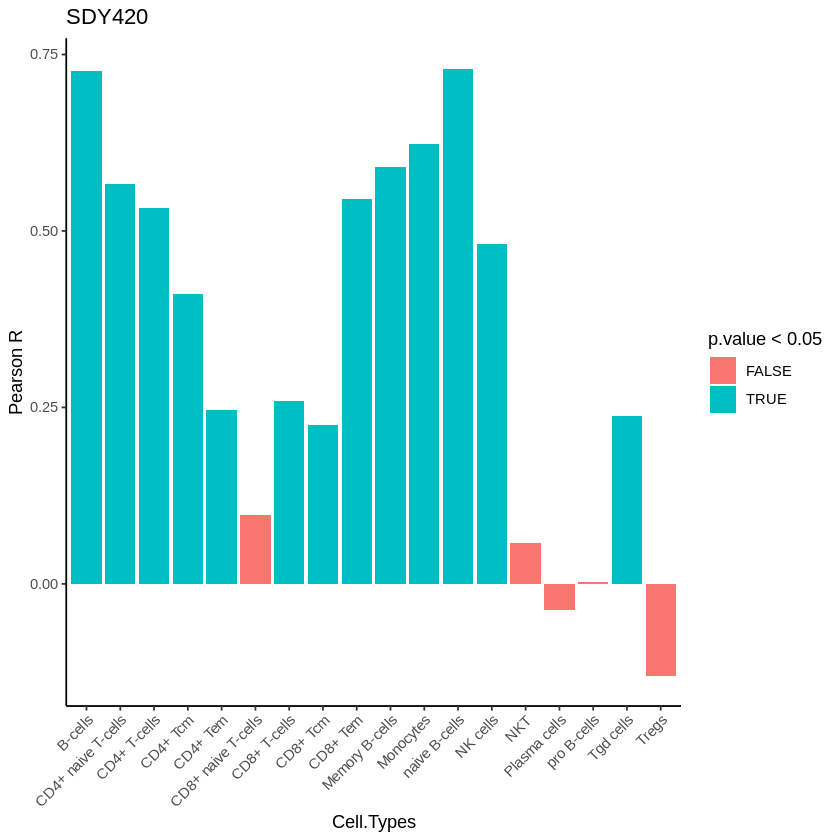

In [ ]:
library(psych)
library(ggplot2)

correlateScoresFCS = function(scores,fcs,tit) {
  fcs = fcs[rownames(scores),colnames(scores)]
  res = corr.test(t(scores),t(fcs),adjust='none')
  df = data.frame(R=diag(res$r),p.value=diag(res$p),Cell.Types=rownames(res$r))
  ggplot(df)+geom_col(aes(y=df$R,x=Cell.Types,fill=p.value<0.05))+theme_classic()+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    ylab('Pearson R')+ggtitle(tit)
}

#correlateScoresFCS(scores311,sdy311$fcs,'SDY311')
correlateScoresFCS(scores420,sdy420$fcs,'SDY420')

In [ ]:
#t(scores420)
signatures = xCell.data$signatures
signatures[["aDC%HPCA%1.txt"]]

setName: aDC%HPCA%1.txt 
geneIds: C1QA, C1QB, ..., CCL22 (total: 8)
geneIdType: Null
collectionType: Null 
details: use 'details(object)'

In [ ]:
library(GSEABase)
toGmt(xCell.data$signatures)

aDC%HPCA%1.txt		C1QA	C1QB	CD80	IL12B	CCL13	CCL17	CCL19	CCL22
aDC%HPCA%2.txt		C1QA	C1QB	CD80	FPR3	HLA-DQA1	IL12B	CCL13	CCL17	CCL19	CCL22
aDC%HPCA%3.txt		C1QA	C1QB	CD80	FPR3	HLA-DQA1	IL12B	CCL13	CCL17	CCL19	CCL22
aDC%IRIS%1.txt		CD80	IL3RA	IL12B	CXCL9	PTGIR	CCL8	CCL13	CCL17	CCL19	CCL23	SLAMF1	SIGLEC1	TRAF1	TNFRSF4	TXN	SOCS3	HS3ST3B1	CD209	LILRA5
aDC%IRIS%2.txt		ACHE	ADPRH	ALOX15B	ANXA5	XIAP	ARF3	RHOG	ATP1B3	BLVRA	C1QA	C1QB	C3AR1	CASP5	CD80	CD86	CCR5	CMKLR1	EIF5	ENO1	ETV3	FCER1G	FCER2	FPR3	GMFB	GNG5	GRB2	RAPGEF1	HCK	HLA-DQA1	HRH2	DNAJA1	IL2RA	IL3RA	IL9	IL10	IL10RA	IL12B	IMPDH1	IRF4	KCNMB1	LAIR1	LOR	RAB8A	CXCL9	MTF1	NFE2L2	NFKB1	NFKBIB	NRAS	OSM	P2RX7	PAK2	PGK1	PITPNA	MAP2K1	PTGIR	RAB5A	RELA	CLIP1	S100A10	CCL1	CCL4	CCL7	CCL8	CCL17	CCL18	CCL19	CCL22	CCL23	CCL24	SLAMF1	SLC1A2	SLC6A12	SIGLEC1	SRC	STAT2	TCF21	DYNLT1	TPI1	TRAF1	TNFRSF4	TXN	VRK2	XPNPEP1	ZBTB17	CUL1	RRP1	SCARF1	ALDH1A2	TAX1BP1	SOCS3	SPAG9	TMSB10	MAP3K13	TRIP4	H6PD	WTAP	ARHGEF11	TMCC2	HS3ST3B1	ABI1	BCL2L11	ARPC4	ARFRP1	RAMP3	LILRB2